In [1]:
import pymysql.cursors
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd

import json
import time

import numpy as np

from bs4 import BeautifulSoup

from pydantic import BaseModel
from typing import List, Optional

from selenium import webdriver

from bs4 import BeautifulSoup as BS
import bs4
import soupsieve

import pymysql
from typing import List, Dict, Optional
from pymysql.cursors import DictCursor

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import os
import pandas as pd
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patheffects import withStroke
from ipywidgets import interact, widgets

import warnings
warnings.filterwarnings('ignore')

C:\Users\Personnel\AppData\Local\Temp\ipykernel_6432\3989414598.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Establish a connection to the MySQL database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='Darwin@nunez9', 
                             database='2023_24_db')
                             #cursorclass=pymysql.cursors.DictCursor)    

# Define your SQL query
query = "SELECT * FROM match_events"

# Use pandas to load the query result into a DataFrame
df_events = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Now you can work with the DataFrame 'df'
df_events

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name
0,2575371175,1734621,4,0,0.0,64,422960,50.1,50.0,32.1,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Successful,FirstHalf
1,2575371189,1734621,5,0,2.0,64,80758,29.0,63.8,76.0,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Unsuccessful,FirstHalf
2,2575371241,1734621,4,0,17.0,1799,338365,24.2,0.0,34.7,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Successful,FirstHalf
3,2575371247,1734621,5,0,18.0,1799,402214,34.7,5.3,38.0,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Unsuccessful,FirstHalf
4,2575371259,1734621,7,0,19.0,64,236575,60.3,83.7,70.2,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Unsuccessful,FirstHalf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771851,2648786157,1729483,1046,34,13.0,31,381045,13.7,64.5,9.8,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Successful,FirstHalf
1771852,2648786175,1729483,1047,34,18.0,31,110189,8.6,39.8,22.1,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Successful,FirstHalf
1771853,2648786257,1729483,1048,34,19.0,31,80464,22.1,34.0,8.8,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Successful,FirstHalf
1771854,2648786869,1729483,1049,50,31.0,31,357427,41.6,94.5,55.2,...,NaN,NaN,NaN,NaN,0,0,0,Pass,Successful,SecondHalf


In [3]:
# Establish a connection to the MySQL database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='Darwin@nunez9', 
                             database='2023_24_db')
                             #cursorclass=pymysql.cursors.DictCursor)    

# Define your SQL query
query = "SELECT * FROM players_info"

# Use pandas to load the query result into a DataFrame
df_players = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Now you can work with the DataFrame 'df'
df_players

,player_id,name,height,weight,appearances,minutes,goals,assists,yellow_cards,red_cards,shots_per_game,passing_accuracy,aerials_won_per_game,man_of_the_match,rating,team_id,positions
0,2987,Pepe Reina,188,92,2,2,0,0,1,1,0.0,0.0,0.0,0,6.00,839,GB
1,4511,James Milner,175,70,11,779,0,2,3,0,0.3,86.4,0.4,0,6.49,211,"D(LR),M(CLR)"
2,6227,Dani Rodríguez,178,71,22,1894,2,4,7,0,1.0,76.5,0.8,1,6.75,51,MO(CGD)
3,6683,Dante,188,87,21,1854,0,1,4,1,0.4,90.7,1.8,0,6.90,613,D(C)
4,8166,Ashley Young,175,65,19,1521,0,0,4,1,0.5,71.7,0.7,0,6.38,31,"D(LR),M(LR)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,514706,Shio Fukuda,178,70,0,21,0,0,0,0,0.3,25.0,0.3,0,6.01,134,Forward
2558,514955,Enzo Mongo,185,0,0,9,0,0,0,0,0.0,0.0,0.0,0,6.17,302,Defender
2559,515006,Sofiane Sidi Ali,175,0,0,4,0,0,0,0,0.0,100.0,0.0,0,6.16,249,Forward
2560,515492,Nathaniel Adjei,0,0,3,281,0,0,0,0,0.0,82.6,1.3,0,6.87,146,Defender


In [4]:
df_events = pd.merge(df_events,df_players[['player_id','name']], on='player_id')
df_events.head()

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,name
0,2575371175,1734621,4,0,0.0,64,422960,50.1,50.0,32.1,...,NaN,NaN,NaN,0,0,0,Pass,Successful,FirstHalf,Randy Nteka
1,2575371189,1734621,5,0,2.0,64,80758,29.0,63.8,76.0,...,NaN,NaN,NaN,0,0,0,Pass,Unsuccessful,FirstHalf,Florian Lejeune
2,2575371241,1734621,4,0,17.0,1799,338365,24.2,0.0,34.7,...,NaN,NaN,NaN,0,0,0,Pass,Successful,FirstHalf,Álex Pozo
3,2575371247,1734621,5,0,18.0,1799,402214,34.7,5.3,38.0,...,NaN,NaN,NaN,0,0,0,Pass,Unsuccessful,FirstHalf,Lázaro
4,2575371259,1734621,7,0,19.0,64,236575,60.3,83.7,70.2,...,NaN,NaN,NaN,0,0,0,Pass,Unsuccessful,FirstHalf,Unai López


In [5]:
df_teams = pd.read_excel('C:/Users/Personnel/Ligue 1 Project/ws_url_teams.xlsx')
df_teams.rename(columns={'id':'team_id'},inplace=True)
df_teams['logo'] = df_teams['team'].apply(
    lambda x: f"C:/Users/Personnel/Ligue 1 Project/logos/{x.lower()}.png"
)
df_events = pd.merge(df_events,df_teams[['team','team_id','league','logo']], on='team_id')

In [6]:
df_players = pd.merge(df_players,df_teams[['team','team_id']],on = 'team_id')
df_players.head()

,player_id,name,height,weight,appearances,minutes,goals,assists,yellow_cards,red_cards,shots_per_game,passing_accuracy,aerials_won_per_game,man_of_the_match,rating,team_id,positions,team
0,2987,Pepe Reina,188,92,2,2,0,0,1,1,0.0,0.0,0.0,0,6.00,839,GB,Villarreal
1,4511,James Milner,175,70,11,779,0,2,3,0,0.3,86.4,0.4,0,6.49,211,"D(LR),M(CLR)",Brighton
2,6227,Dani Rodríguez,178,71,22,1894,2,4,7,0,1.0,76.5,0.8,1,6.75,51,MO(CGD),Mallorca
3,6683,Dante,188,87,21,1854,0,1,4,1,0.4,90.7,1.8,0,6.90,613,D(C),Nice
4,8166,Ashley Young,175,65,19,1521,0,0,4,1,0.5,71.7,0.7,0,6.38,31,"D(LR),M(LR)",Everton


In [7]:
df_events

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,name,team,league,logo
0,2575371175,1734621,4,0,0.0,64,422960,50.1,50.0,32.1,...,0,0,0,Pass,Successful,FirstHalf,Randy Nteka,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...
1,2575371189,1734621,5,0,2.0,64,80758,29.0,63.8,76.0,...,0,0,0,Pass,Unsuccessful,FirstHalf,Florian Lejeune,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...
2,2575371241,1734621,4,0,17.0,1799,338365,24.2,0.0,34.7,...,0,0,0,Pass,Successful,FirstHalf,Álex Pozo,Almeria,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/almer...
3,2575371247,1734621,5,0,18.0,1799,402214,34.7,5.3,38.0,...,0,0,0,Pass,Unsuccessful,FirstHalf,Lázaro,Almeria,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/almer...
4,2575371259,1734621,7,0,19.0,64,236575,60.3,83.7,70.2,...,0,0,0,Pass,Unsuccessful,FirstHalf,Unai López,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771851,2648786157,1729483,1046,34,13.0,31,381045,13.7,64.5,9.8,...,0,0,0,Pass,Successful,FirstHalf,Jarrad Branthwaite,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...
1771852,2648786175,1729483,1047,34,18.0,31,110189,8.6,39.8,22.1,...,0,0,0,Pass,Successful,FirstHalf,Jordan Pickford,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...
1771853,2648786257,1729483,1048,34,19.0,31,80464,22.1,34.0,8.8,...,0,0,0,Pass,Successful,FirstHalf,Idrissa Gueye,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...
1771854,2648786869,1729483,1049,50,31.0,31,357427,41.6,94.5,55.2,...,0,0,0,Pass,Successful,SecondHalf,Dwight McNeil,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...


# I. PLAYERS ANALYSIS

# 1. PASSES ANALYSIS

## 1.1 PROGRESSIVE PASSES & xT

In [8]:
df_pass = df_events[df_events['type_display_name']=='Pass']
df_pass.head(5)

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,name,team,league,logo
0,2575371175,1734621,4,0,0.0,64,422960,50.1,50.0,32.1,...,0,0,0,Pass,Successful,FirstHalf,Randy Nteka,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...
1,2575371189,1734621,5,0,2.0,64,80758,29.0,63.8,76.0,...,0,0,0,Pass,Unsuccessful,FirstHalf,Florian Lejeune,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...
2,2575371241,1734621,4,0,17.0,1799,338365,24.2,0.0,34.7,...,0,0,0,Pass,Successful,FirstHalf,Álex Pozo,Almeria,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/almer...
3,2575371247,1734621,5,0,18.0,1799,402214,34.7,5.3,38.0,...,0,0,0,Pass,Unsuccessful,FirstHalf,Lázaro,Almeria,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/almer...
4,2575371259,1734621,7,0,19.0,64,236575,60.3,83.7,70.2,...,0,0,0,Pass,Unsuccessful,FirstHalf,Unai López,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...


In [9]:
df_pass['beginning'] = np.sqrt(np.square(100-df_pass['x']) + np.square(50-df_pass['y']))
df_pass['end'] = np.sqrt(np.square(100-df_pass['end_x']) + np.square(50-df_pass['end_y']))

# Updated code to calculate 'progressive' using .apply()
df_pass['progressive'] = df_pass.apply(
    lambda row: (
        abs(row['end'] / row['beginning']) < 0.75) and 
        (row['end'] < row['beginning']) and 
        (row['beginning'] < 0.6 * 100) and 
        not ((1.2*row['x'] > 119) & ((0.8*row['y'] > 79) | (0.8*row['y'] < 1))
    ),
    axis=1
)


df_pass.x = df_pass.x * 1.2
df_pass.end_x = df_pass.end_x * 1.2
df_pass.y = df_pass.y * 0.8
df_pass.end_y = df_pass.end_y * 0.8

df_pass

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,type_display_name,outcome_type_display_name,period_display_name,name,team,league,logo,beginning,end,progressive
0,2575371175,1734621,4,0,0.0,64,422960,60.12,40.00,38.52,...,Pass,Successful,FirstHalf,Randy Nteka,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...,49.900000,68.969703,False
1,2575371189,1734621,5,0,2.0,64,80758,34.80,51.04,91.20,...,Pass,Unsuccessful,FirstHalf,Florian Lejeune,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...,72.328694,55.461698,False
2,2575371241,1734621,4,0,17.0,1799,338365,29.04,0.00,41.64,...,Pass,Successful,FirstHalf,Álex Pozo,Almeria,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/almer...,90.805506,79.133937,False
3,2575371247,1734621,5,0,18.0,1799,402214,41.64,4.24,45.60,...,Pass,Unsuccessful,FirstHalf,Lázaro,Almeria,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/almer...,79.133937,70.807062,False
4,2575371259,1734621,7,0,19.0,64,236575,72.36,66.96,84.24,...,Pass,Unsuccessful,FirstHalf,Unai López,Rayo-Vallecano,Espagne-LaLiga,C:/Users/Personnel/Ligue 1 Project/logos/rayo-...,52.074754,50.928676,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771851,2648786157,1729483,1046,34,13.0,31,381045,16.44,51.60,11.76,...,Pass,Successful,FirstHalf,Jarrad Branthwaite,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...,87.509657,90.994725,False
1771852,2648786175,1729483,1047,34,18.0,31,110189,10.32,31.84,26.52,...,Pass,Successful,FirstHalf,Jordan Pickford,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...,91.967386,79.526159,False
1771853,2648786257,1729483,1048,34,19.0,31,80464,26.52,27.20,10.56,...,Pass,Successful,FirstHalf,Idrissa Gueye,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...,79.526159,91.259684,False
1771854,2648786869,1729483,1049,50,31.0,31,357427,49.92,75.60,66.24,...,Pass,Successful,SecondHalf,Dwight McNeil,Everton,Angleterre-Premier-League,C:/Users/Personnel/Ligue 1 Project/logos/evert...,73.422136,58.295197,False


In [10]:
#xT_grid
xT = pd.read_csv('C:/Users/Personnel/Ligue 1 Project/xT_grid.csv',header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [11]:
df_pass['x1_bin'] = pd.cut(df_pass['x'], bins=xT_cols, labels=False)
df_pass['y1_bin'] = pd.cut(df_pass['y'], bins=xT_rows, labels=False)
df_pass['x2_bin'] = pd.cut(df_pass['end_x'], bins=xT_cols, labels=False)
df_pass['y2_bin'] = pd.cut(df_pass['end_y'], bins=xT_rows, labels=False)

df_pass['start_zone_value'] = df_pass[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
df_pass['end_zone_value'] = df_pass[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
df_pass['xT'] = df_pass['end_zone_value'] - df_pass['start_zone_value']

df_pass.head()

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,beginning,end,progressive,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
0,2575371175,1734621,4,0,0.0,64,422960,60.12,40.00,38.52,...,49.900000,68.969703,False,6,3,3,4,0.016895,0.011324,-0.005572
1,2575371189,1734621,5,0,2.0,64,80758,34.80,51.04,91.20,...,72.328694,55.461698,False,3,5,9,7,0.011105,0.027563,0.016459
2,2575371241,1734621,4,0,17.0,1799,338365,29.04,0.00,41.64,...,90.805506,79.133937,False,2,0,4,0,0.008449,0.011263,0.002814
3,2575371247,1734621,5,0,18.0,1799,402214,41.64,4.24,45.60,...,79.133937,70.807062,False,4,0,4,1,0.011263,0.012147,0.000885
4,2575371259,1734621,7,0,19.0,64,236575,72.36,66.96,84.24,...,52.074754,50.928676,False,7,6,8,7,0.018703,0.021221,0.002518


In [12]:
prog_passes = df_pass.loc[df_pass['progressive'] == True].reset_index()
prog_passes.head()

,index,id,match_id,event_id,minute,second,team_id,player_id,x,y,...,beginning,end,progressive,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
0,63,2575372763,1734621,43,3,11.0,64,101613,98.88,3.60,...,48.785346,9.962429,True,9,0,11,3,0.027563,0.257454,0.229890
1,72,2575373171,1734621,41,3,53.0,1799,388665,64.44,33.44,...,47.020527,31.351714,True,6,3,8,4,0.016895,0.023851,0.006956
2,104,2575374333,1734621,76,5,43.0,64,236575,105.72,74.24,...,44.423530,3.488553,True,10,7,11,4,0.034851,0.257454,0.222603
3,114,2575374663,1734621,60,6,12.0,1799,388665,78.96,25.44,...,38.741193,16.324828,True,7,2,10,3,0.019351,0.108051,0.088700
4,142,2575375645,1734621,93,7,43.0,64,16942,107.28,59.28,...,26.328122,12.432618,True,10,5,10,4,0.054911,0.108051,0.053140


In [13]:
prog_passes_xt = prog_passes.groupby(['player_id','name'])['xT'].sum().reset_index()
prog_passes_xt.sort_values(by='xT',ascending=False,inplace=True)
prog_passes_xt.head()

,player_id,name,xT
163,83078,Kieran Trippier,19.880107
1046,330538,David Raum,17.391573
419,122469,Giovanni Di Lorenzo,16.567058
58,34112,Antonio Candreva,16.481248
854,300291,Romain Del Castillo,16.268172


In [14]:
df_players.head()

,player_id,name,height,weight,appearances,minutes,goals,assists,yellow_cards,red_cards,shots_per_game,passing_accuracy,aerials_won_per_game,man_of_the_match,rating,team_id,positions,team
0,2987,Pepe Reina,188,92,2,2,0,0,1,1,0.0,0.0,0.0,0,6.00,839,GB,Villarreal
1,4511,James Milner,175,70,11,779,0,2,3,0,0.3,86.4,0.4,0,6.49,211,"D(LR),M(CLR)",Brighton
2,6227,Dani Rodríguez,178,71,22,1894,2,4,7,0,1.0,76.5,0.8,1,6.75,51,MO(CGD),Mallorca
3,6683,Dante,188,87,21,1854,0,1,4,1,0.4,90.7,1.8,0,6.90,613,D(C),Nice
4,8166,Ashley Young,175,65,19,1521,0,0,4,1,0.5,71.7,0.7,0,6.38,31,"D(LR),M(LR)",Everton


In [15]:
prog_passes_grouped = prog_passes.groupby(['player_id','name'])['progressive'].count().reset_index()
prog_passes_grouped.sort_values(by='progressive',ascending=False,inplace=True)
prog_passes_grouped = pd.merge(prog_passes_grouped,prog_passes_xt[['player_id','xT']],on='player_id')
prog_passes_grouped = pd.merge(prog_passes_grouped, df_players[['player_id','minutes','positions','team']],on='player_id')
prog_passes_grouped = pd.merge(prog_passes_grouped, df_teams[['team','logo']],on='team')
prog_passes_grouped.head(10)

,player_id,name,progressive,xT,minutes,positions,team,logo
0,83078,Kieran Trippier,290,19.880107,2025,"D(LR),M(R)",Newcastle,C:/Users/Personnel/Ligue 1 Project/logos/newca...
1,104011,Kevin Stöger,268,14.537124,1612,M(CG),Bochum,C:/Users/Personnel/Ligue 1 Project/logos/bochu...
2,123761,Bruno Fernandes,252,15.514320,2160,M(CLR),Manchester-United,C:/Users/Personnel/Ligue 1 Project/logos/manch...
3,122469,Giovanni Di Lorenzo,244,16.567058,2160,"D(CG),M(D)",Napoli,C:/Users/Personnel/Ligue 1 Project/logos/napol...
4,330538,David Raum,242,17.391573,1935,"D(G),M(GD)",RB-Leipzig,C:/Users/Personnel/Ligue 1 Project/logos/rb-le...
5,397469,Óscar Mingueza,233,13.104339,1967,"D(C),M(D)",Celta-Vigo,C:/Users/Personnel/Ligue 1 Project/logos/celta...
6,318871,Trent Alexander-Arnold,231,14.923246,1627,"D(R),DMC,M(R)",Liverpool,C:/Users/Personnel/Ligue 1 Project/logos/liver...
7,300291,Romain Del Castillo,228,16.268172,1770,"MO(CGD),AC",Brest,C:/Users/Personnel/Ligue 1 Project/logos/brest...
8,234377,Téji Savanier,226,15.074386,1933,M(C),Montpellier,C:/Users/Personnel/Ligue 1 Project/logos/montp...
9,93935,Cristiano Biraghi,218,13.545928,1641,"D(G),M(G)",Fiorentina,C:/Users/Personnel/Ligue 1 Project/logos/fiore...


In [16]:
test = prog_passes_grouped[prog_passes_grouped['name']=='Farès Chaïbi']
test

,player_id,name,progressive,xT,minutes,positions,team,logo
217,444725,Farès Chaïbi,103,8.30734,56,"MO(CG),AC",Toulouse,C:/Users/Personnel/Ligue 1 Project/logos/toulo...


In [17]:
#filtering the data + 900mn played
prog_passes_grouped = prog_passes_grouped[prog_passes_grouped['minutes']>900]

#P90 Data
prog_passes_grouped['progressive'] = prog_passes_grouped['progressive']*90/prog_passes_grouped['minutes']
prog_passes_grouped['xT'] = prog_passes_grouped['xT']*90/prog_passes_grouped['minutes']

Text(0.12, 0.05, 'Progressive Passes')

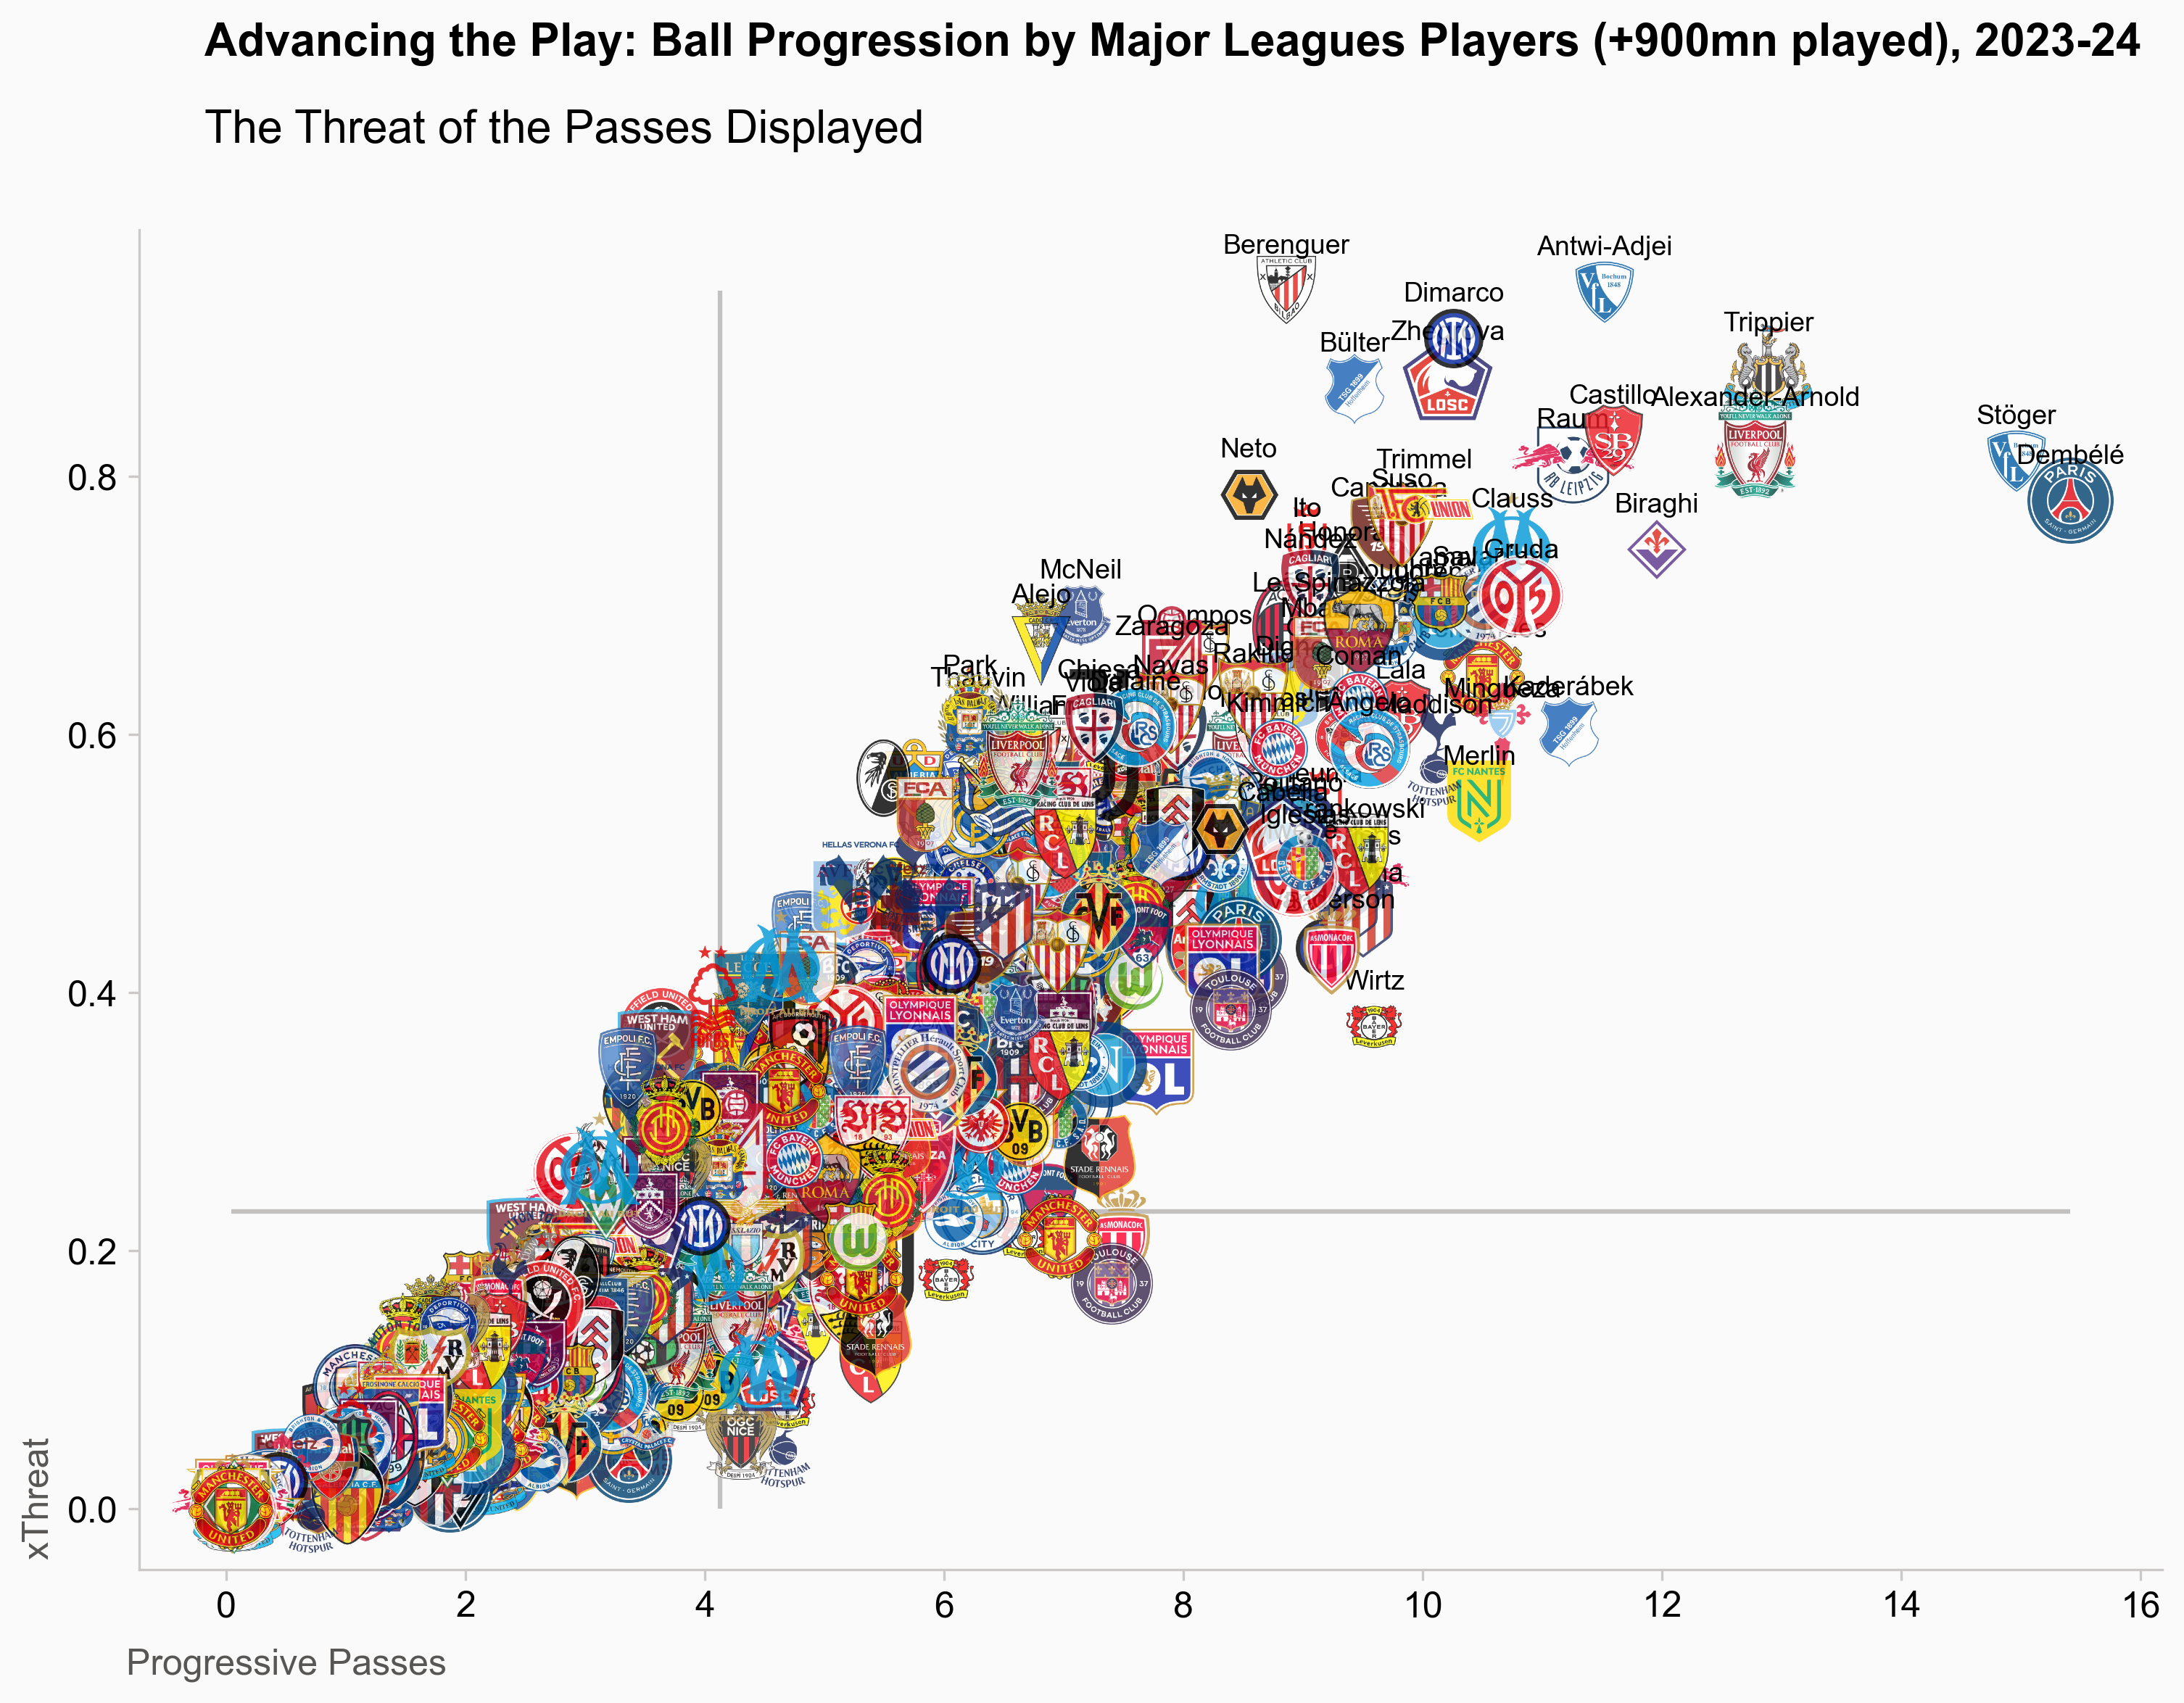

In [18]:
def getImage(badge):
    return OffsetImage(plt.imread(badge), zoom=.15, alpha = 0.8)

# Set font and background colour
plt.rcParams.update({'font.family':'Arial'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(prog_passes_grouped['progressive'], prog_passes_grouped['xT'], color=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
#def getImage(badge):
#   return OffsetImage(plt.imread(badge), zoom=.35, alpha = 1)


# Calculate the third quartile values for PrgC and PrgP
third_quartile_prog_passes = prog_passes_grouped['progressive'].quantile(0.95)
third_quartile_xT = prog_passes_grouped['xT'].quantile(0.95)

for index, row in prog_passes_grouped.iterrows():
    ab = AnnotationBbox(getImage(row['logo']), (row['progressive'], row['xT']), frameon=False)
    ax.add_artist(ab)
    if row['progressive'] > third_quartile_prog_passes or row['xT'] > third_quartile_xT:  
        family_name = row['name'].split()[-1]
        ax.text(row['progressive'], row['xT']+0.025, family_name, fontsize=9, ha='center', va='bottom')  # Adjust the fontsize and position as needed

# Add average lines
avg_prgp = prog_passes_grouped['progressive'].mean()
avg_xT = prog_passes_grouped['xT'].mean()

# Add average lines
plt.vlines(avg_prgp, prog_passes_grouped['xT'].min(), prog_passes_grouped['xT'].max(), color='#c2c1c0')
plt.hlines(avg_xT, prog_passes_grouped['progressive'].min(), prog_passes_grouped['progressive'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.15,.98,'Advancing the Play: Ball Progression by Major Leagues Players (+900mn played), 2023-24',size=15,weight='bold')
fig.text(.15,.93,'The Threat of the Passes Displayed ', size=15)

# axes titles
fig.text(.08,.12,'xThreat', size=12, color='#575654',rotation=90)
fig.text(.12,0.05,'Progressive Passes', size=12, color='#575654')

# avg line titles
#fig.text(0.1,0.1, 'Avg. PrgP', size=6, color='#c2c1c0')
#fig.text(avg_prgc,0.1, 'Avg. PrgC', size=6, color='#c2c1c0', rotation=90)

## Save plot
#plt.savefig(
 #   "C:/Users/Personnel/Ligue 1 Project/Figs/Ligue1_Progressive_passes_players_xT.png",
  #  facecolor=ax.get_facecolor(),
   # dpi=1200,
   # bbox_inches="tight"
#)

In [19]:
# Unique teams and players from player_xT_tmp DataFrame
teams = df_teams['team'].unique()
players_by_team = {team: prog_passes_grouped[prog_passes_grouped['team'] == team]['name'].tolist() for team in teams}

In [73]:
# Assuming 'player_xT_tmp' and 'df_touches' are predefined DataFrames
# Unique teams and players from player_xT_tmp DataFrame
teams = df_teams['team'].unique()
players_by_team = {team: prog_passes_grouped[prog_passes_grouped['team'] == team]['name'].tolist() for team in teams}


# Interactive widgets
team_dropdown = widgets.Dropdown(options=teams, description='Team:')
player_dropdown = widgets.Dropdown(options=[], description='Player:')

def update_players(*args):
    player_dropdown.options = players_by_team[team_dropdown.value]

team_dropdown.observe(update_players, 'value')

def plot_combined(team, player):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

    # Check if the player data is available in the DataFrame
    player_data = prog_passes_grouped[prog_passes_grouped['name'] == player]
    if not player_data.empty:
        team_badge_row = player_data.iloc[0]
        team_badge_path = team_badge_row['logo']

        if pd.notna(team_badge_path) and os.path.exists(team_badge_path):
            team_badge_imagebox = OffsetImage(plt.imread(team_badge_path), zoom=0.4)
            team_badge_ab = AnnotationBbox(team_badge_imagebox, (0.33, 0.72), xycoords='figure fraction', frameon=False)
            fig.add_artist(team_badge_ab)
    else:
        print("Select a Player")

    # Main Title with Player Name
    fig.suptitle(f"{player} \n On-Field Impact", fontsize=20,weight='bold')

    # Plot Progressive Passes
    pitch1 = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')
    pitch1.draw(ax=axs[0])
    #axs[0].set_title('Progressive Passes', fontsize=14)
    plot_prog_passes(player, pitch1, axs[0])

    # Plot Heatmap
    pitch2 = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')
    pitch2.draw(ax=axs[1])
    #axs[1].set_title('Heatmap', fontsize=14)
    plot_heatmap(player, team, pitch2, axs[1])

    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.show()



def plot_prog_passes(player, pitch,ax):
    
    ax.text(0.5, 1.15, 'Progressive Passes', fontsize=12, color='black', fontweight='bold', ha='center', va='center', transform=ax.transAxes)  # Adjusted y-coordinate

    if prog_passes[prog_passes['name'] == player].empty:
        return
    

    # Add lines for the selected player
    selected_player_df = prog_passes[prog_passes['name'] == player]
    successful_prog_passes = selected_player_df[selected_player_df['outcome_type_display_name'] == 'Successful']
    unsuccessful_prog_passes = selected_player_df[selected_player_df['outcome_type_display_name'] == 'Unsuccessful']

    # Calculate the percentage of successful passes
    num_successful_passes = len(successful_prog_passes)
    num_unsuccessful_passes = len(unsuccessful_prog_passes)
    total_passes = num_successful_passes + num_unsuccessful_passes
    percentage_successful_passes = (num_successful_passes / total_passes) * 100
    
    pitch.lines(unsuccessful_prog_passes.x, 80 - unsuccessful_prog_passes.y, unsuccessful_prog_passes.end_x, 80 - unsuccessful_prog_passes.end_y, comet=True, color='red',alpha=0.25, ax=ax)
    pitch.lines(successful_prog_passes.x, 80 - successful_prog_passes.y, successful_prog_passes.end_x, 80 - successful_prog_passes.end_y, comet=True, color='green',alpha=0.3, ax=ax)

    # Add team badge
    team_badge_row = prog_passes_grouped[prog_passes_grouped['name'] == player].iloc[0]
    team_badge_path = team_badge_row['logo']
    

    # Add player name and additional information
    player_name = team_badge_row['name']
    player_xT_value = team_badge_row['xT']
    prgp_90_value = team_badge_row['progressive'] 

    ax.text(0.5, 1.1, f'PrgP per 90: {prgp_90_value:.2f}', fontsize=10, color='black', ha='center', va='center', transform=ax.transAxes)  # Adjusted y-coordinate
    ax.text(0.5, 1.05, f'Success rate: {percentage_successful_passes:.2f} %', fontsize=10, color='black', ha='center', va='center', transform=ax.transAxes)  # Adjusted y-coordinate
    
# Function to plot the heatmap
def plot_heatmap(player, team, pitch,ax):
    
    df_touches = df_events[df_events['is_touch']==True]
    df_selected_touches = df_touches[(df_touches['team'] == team) & (df_touches['name'] == player)]
    ax.text(0.5, 1.15, 'Player Heatmap', fontsize=12, color='black', fontweight='bold', ha='center', va='center', transform=ax.transAxes)  # Adjusted y-coordinate

    if not df_selected_touches.empty:
        # Binned statistic for the heatmap
        bin_statistic = pitch.bin_statistic_positional(df_selected_touches.x*1.2,80- df_selected_touches.y*0.8, statistic='count',
                                                       positional='full', normalize=True)
        # Plot the heatmap
        pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
        # Scatter plot for touches
        pitch.scatter(df_selected_touches.x * 1.2, 80 - df_selected_touches.y * 0.8, c='white', s=1.2, ax=ax)
        # Label the heatmap
        labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=14,
                                     ax=ax, ha='center', va='center',
                                     str_format='{:.0%}', path_effects=[withStroke(linewidth=3, foreground='black')])


#interact(plot_heatmap,team=team_dropdown,player=player_dropdown)
#interact(plot_prog_passes,team=team_dropdown,player=player_dropdown)

interact(plot_combined, team=team_dropdown, player=player_dropdown);


interactive(children=(Dropdown(description='Team:', options=('Almeria', 'Arsenal', 'Aston-Villa', 'Atalanta', …

# II. TEAMS ANALYSIS

# 1. PASSES ANALYSIS

## 1.1 PASS NETWORKS

In [44]:
df_players

,player_id,name,height,weight,appearances,minutes,goals,assists,yellow_cards,red_cards,shots_per_game,passing_accuracy,aerials_won_per_game,man_of_the_match,rating,team_id,positions,team
0,2987,Pepe Reina,188,92,2,2,0,0,1,1,0.0,0.0,0.0,0,6.00,839,GB,Villarreal
1,4511,James Milner,175,70,11,779,0,2,3,0,0.3,86.4,0.4,0,6.49,211,"D(LR),M(CLR)",Brighton
2,6227,Dani Rodríguez,178,71,22,1894,2,4,7,0,1.0,76.5,0.8,1,6.75,51,MO(CGD),Mallorca
3,6683,Dante,188,87,21,1854,0,1,4,1,0.4,90.7,1.8,0,6.90,613,D(C),Nice
4,8166,Ashley Young,175,65,19,1521,0,0,4,1,0.5,71.7,0.7,0,6.38,31,"D(LR),M(LR)",Everton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,514706,Shio Fukuda,178,70,0,21,0,0,0,0,0.3,25.0,0.3,0,6.01,134,Forward,Borussia-M-Gladbach
2558,514955,Enzo Mongo,185,0,0,9,0,0,0,0,0.0,0.0,0.0,0,6.17,302,Defender,Nantes
2559,515006,Sofiane Sidi Ali,175,0,0,4,0,0,0,0,0.0,100.0,0.0,0,6.16,249,Forward,Marseille
2560,515492,Nathaniel Adjei,0,0,3,281,0,0,0,0,0.0,82.6,1.3,0,6.87,146,Defender,Lorient


In [46]:
# Establish a connection to the MySQL database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='Darwin@nunez9', 
                             database='2023_24_db')
                             #cursorclass=pymysql.cursors.DictCursor)    

# Define your SQL query
query = "SELECT * FROM players"

# Use pandas to load the query result into a DataFrame
df_players_info = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Now you can work with the DataFrame 'df'
df_players_info

,player_id,shirt_no,name,age,position,team_id
0,2987,1,Pepe Reina,41,Sub,839
1,4511,6,James Milner,38,MC,211
2,6227,14,Dani Rodríguez,35,MC,51
3,6683,4,Dante,40,DC,613
4,8105,31,Andy Lonergan,40,Sub,31
...,...,...,...,...,...,...
3150,516374,41,Jacobo Ramón,19,Sub,52
3151,516952,79,Ollie Harrison,16,Sub,15
3152,517009,45,Billy Blacker,17,Sub,163
3153,517014,40,Filippo Vertua,18,Sub,272


In [47]:
shirt_no = pd.merge(df_players[['player_id','name','team_id','team','positions']],df_players_info[['player_id','shirt_no']],on='player_id')
shirt_no

,player_id,name,team_id,team,positions,shirt_no
0,2987,Pepe Reina,839,Villarreal,GB,1
1,4511,James Milner,211,Brighton,"D(LR),M(CLR)",6
2,6227,Dani Rodríguez,51,Mallorca,MO(CGD),14
3,6683,Dante,613,Nice,D(C),4
4,8166,Ashley Young,31,Everton,"D(LR),M(LR)",18
...,...,...,...,...,...,...
2557,514706,Shio Fukuda,134,Borussia-M-Gladbach,Forward,49
2558,514955,Enzo Mongo,302,Nantes,Defender,46
2559,515006,Sofiane Sidi Ali,249,Marseille,Forward,41
2560,515492,Nathaniel Adjei,146,Lorient,Defender,32


In [53]:
# Afficher les premières lignes pour vérifier le résultat
df_teams.head()

,url,league,team_id,team,logo
0,https://fr.whoscored.com/Teams/1799/Fixtures/E...,LaLiga,1799,Almeria,C:/Users/Personnel/Ligue 1 Project/logos/almer...
1,https://www.whoscored.com/Teams/13/Fixtures/An...,Premier-League,13,Arsenal,C:/Users/Personnel/Ligue 1 Project/logos/arsen...
2,https://www.whoscored.com/Teams/24/Fixtures/An...,Premier-League,24,Aston-Villa,C:/Users/Personnel/Ligue 1 Project/logos/aston...
3,https://fr.whoscored.com/Teams/300/Fixtures/It...,Serie-A,300,Atalanta,C:/Users/Personnel/Ligue 1 Project/logos/atala...
4,https://fr.whoscored.com/Teams/53/Fixtures/Esp...,LaLiga,53,Athletic-Club,C:/Users/Personnel/Ligue 1 Project/logos/athle...


In [71]:
def get_last_match_id(df_events, team_selected):
    
    team_events = df_events[df_events['team'] == team_selected]
    unique_match_ids = team_events['match_id'].unique()
    
    # Extract the last three match IDs
    last_match_id = unique_match_ids[-1:]
    
    return last_match_id

# Example usage:
team_name = 'Brentford'
last_match_id = get_last_match_id(df_events, team_name)
print(last_match_id)

[1729481]


In [79]:
from ipywidgets import widgets, Layout, HBox, VBox, Output
from IPython.display import display

# Assuming df_teams is your DataFrame and it has columns 'league' and 'team'
leagues = df_teams['league'].unique()
league_buttons = [widgets.Button(description=league, layout=Layout(width='250px')) for league in leagues]

# Output widget to display teams
output_teams = Output()

# Function to display teams for selected league
def on_league_button_clicked(b):
    selected_league = b.description
    teams_in_league = df_teams[df_teams['league'] == selected_league]['team'].unique()
    team_buttons = [widgets.Button(description=team, layout=Layout(width='150px')) for team in teams_in_league]
    
    def on_team_button_clicked(b):
        # Here, 'b' is the clicked button. 'b.description' gives the team name.
        last_match_id = get_last_match_id(df_events, b.description)
        df_last_match = df_events[df_events['match_id']==last_match_id]
        print("Last match ID for", b.description, ":", df_last_match)
        
    team_buttons = []
    for team in teams_in_league:
        button = widgets.Button(description=team, layout=Layout(width='150px'))
        button.on_click(on_team_button_clicked)
        team_buttons.append(button)
    
    # Update the output widget with team buttons
    with output_teams:
        output_teams.clear_output()
        display(widgets.HTML(value="<b>Select a team</b>"))
        num_buttons_in_row = 6  # or adjust based on the number of teams
        team_buttons_layout = VBox([HBox(team_buttons[i:i+num_buttons_in_row]) for i in range(0, len(team_buttons), num_buttons_in_row)])
        display(team_buttons_layout)
        
        
# Assign the click event to the league buttons
for button in league_buttons:
    button.on_click(on_league_button_clicked)

# Display league buttons
display(HBox(league_buttons))

# Display the output area for teams
display(output_teams)

Output()

In [82]:
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import Layout, HBox, VBox, Output

def on_team_button_clicked(b):
    # Extract the last match ID for the selected team
    last_match_id = get_last_match_id(df_events, b.description)
    if isinstance(last_match_id, np.ndarray):
        last_match_id = last_match_id.item() 
    if last_match_id is not None:
        # Filter df_events to get the DataFrame for the specific last match ID
        df_last_match = df_events[df_events['match_id'] == last_match_id]
        
        # Use the output_teams widget to display the DataFrame
        with output_teams:
            output_teams.clear_output()  # Clear any previous output
            print("Last match ID for", b.description, ":", last_match_id)
            display(df_last_match)  # Display the DataFrame
    else:
        with output_teams:
            output_teams.clear_output()  # Clear any previous output
            print("No matches found for", b.description)

# Function to handle league button clicks and display team buttons
def on_league_button_clicked(b):
    selected_league = b.description
    teams_in_league = df_teams[df_teams['league'] == selected_league]['team'].unique()
    team_buttons = [widgets.Button(description=team, layout=Layout(width='150px')) for team in teams_in_league]

    for button in team_buttons:
        button.on_click(on_team_button_clicked)

    # Update the output widget with team buttons
    with output_teams:
        output_teams.clear_output()
        display(widgets.HTML(value="<b>Select a team</b>"))
        num_buttons_per_row = 6
        team_buttons_layout = VBox([HBox(team_buttons[i:i+num_buttons_per_row]) for i in range(0, len(team_buttons), num_buttons_per_row)])
        display(team_buttons_layout)

# Assuming df_teams is defined and contains 'league' and 'team' columns
leagues = df_teams['league'].unique()
league_buttons = [widgets.Button(description=league, layout=Layout(width='250px')) for league in leagues]

# Create output widget for displaying team buttons and DataFrame
output_teams = Output()

# Assign click event to league buttons
for button in league_buttons:
    button.on_click(on_league_button_clicked)

# Display everything
display(HBox(league_buttons))
display(output_teams)


Output()

In [12]:
df_pass.columns

Index(['id', 'match_id', 'event_id', 'minute', 'second', 'team_id',
       'player_id', 'x', 'y', 'end_x', 'end_y', 'qualifiers', 'is_touch',
       'blocked_x', 'blocked_y', 'goal_mouth_z', 'goal_mouth_y', 'is_shot',
       'card_type', 'is_goal', 'type_display_name',
       'outcome_type_display_name', 'period_display_name', 'beginning', 'end',
       'progressive'],
      dtype='object')

## Relationship between Shots & Goals

In [ ]:
import pymysql
import pandas as pd


# Establish a database connection
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='Darwin@nunez9', 
                             database='2023_24_db',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
        # SQL query
        sql_query = """
        SELECT
            p.player_id,
            p.name AS player_name,
            p.positions AS position,
            t.team AS team_name,
            COUNT(CASE WHEN m.is_shot = 1 THEN 1 END) AS total_shots,
            SUM(m.is_goal) AS total_goals
        FROM
            players_info p
        JOIN
            match_events m ON p.player_id = m.player_id
        JOIN
            teams t ON p.team_id = t.team_id
        WHERE
            p.minutes > 900
        GROUP BY
            p.player_id, p.name, p.positions, t.team
        HAVING
            total_shots > 30;
        """
        
        # Execute the query
        cursor.execute(sql_query)
        
        # Fetch the results
        result = cursor.fetchall()
        
        # Optionally, convert to a pandas DataFrame
        df = pd.DataFrame(result)
        
finally:
    connection.close()

# Display the DataFrame (or process it as needed)
df

#add per90

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already created and looks like the data you provided
# If you need to recreate the DataFrame, use the data variable and pd.DataFrame() method as previously shown

df['total_goals'] = df['total_goals'].astype(int)
third_quartile_shots = df['total_shots'].quantile(0.9)
third_quartile_goals = df['total_goals'].quantile(0.9)


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_shots'], df['total_goals'], color='blue', alpha=0.5)

# Annotate player names who surpass the 3rd quartile of total shots
for _, row in df.iterrows():
    if (row['total_shots'] > third_quartile_shots) or (row['total_goals'] > third_quartile_goals) :
        family_name = row['player_name'].split()[-1]
        plt.text(row['total_shots']-1.5, row['total_goals']+0.5, family_name, fontsize=8)
        
avg_total_shots = df['total_shots'].mean()
avg_total_goals = df['total_goals'].mean()

plt.axvline(avg_total_shots, color='green', linestyle='--', linewidth=1, label=f'Avg. Shots: {avg_total_shots:.2f}')
plt.axhline(avg_total_goals, color='red', linestyle='--', linewidth=1, label=f'Avg. Goals: {avg_total_goals:.2f}')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figtext(0.8, 0.01, 'Source: Whoscored', ha='left', fontsize=8)


plt.title('Relationship between total Shots taken and Goals scored\n', fontsize=14, fontweight='bold', family='sans-serif')

plt.text(34,26.05,'+900 minutes played & +30 shots',
             fontsize=10)

plt.xlabel('Total Shots')
plt.ylabel('Total Goals')
plt.legend(loc='lower right')

plt.grid(False)
plt.show()


In [7]:
df_events.columns

Index(['id', 'match_id', 'event_id', 'minute', 'second', 'team_id',
       'player_id', 'x', 'y', 'end_x', 'end_y', 'qualifiers', 'is_touch',
       'blocked_x', 'blocked_y', 'goal_mouth_z', 'goal_mouth_y', 'is_shot',
       'card_type', 'is_goal', 'type_display_name',
       'outcome_type_display_name', 'period_display_name'],
      dtype='object')